In [219]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Задание

1. Разработать линейный конгруэнтный ГПСЧ.
2. Проверить равномерность распределения получаемой последовательности. Для этого построить гистограмму для получаемой последовательности и сравнить её с идеальной теоретической формой.
3. Найти длину периода генератора. Для этого определить элемент последовательности, заведомо лежащий внутри периода и подсчитать количество итераций до повторного появления в последовательности этого элемента.
4. Проверить качество младших разрядов последовательности. Для этого построить новую последовательность, элементы которой состоят из нескольких младших разрядов членов основной последовательности и выполнить для неё пункты 2 и 3 задания.

In [220]:
# 1. Разработать линейный конгруэнтный ГПСЧ.
class PseudoRandomGenerator:
  def __init__(self, module: int, multiplier: int, increment: int, seed: int):
    if not (0 <= seed < module):
      raise ValueError('seed (start value) must be in [0 and module)')
    if not (0 <= increment < module):
      raise ValueError('increment must be in [0 and module)')
    if not (0 <= multiplier < module):
      raise ValueError('multiplier must be in [0 and module)')
    
    self.module = module
    self.multiplier = multiplier
    self.increment = increment
    self.current = seed

  def next(self):
    self.current = (self.multiplier * self.current + self.increment) % self.module
    return self.current

In [221]:
AMOUNT = 240

MODULE = 175
MULTIPLIER = 2
START_VALUE = 13
INCREMENT = 1

dict_keys([27, 55, 111, 48, 97, 20, 41, 83, 167, 160, 146, 118, 62, 125, 76, 153, 132, 90, 6, 13])


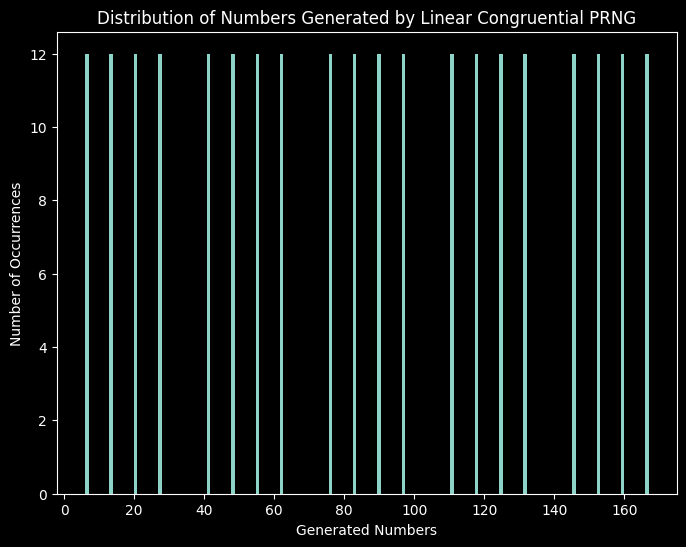

In [222]:
# 2. проверка равномерности

prg = PseudoRandomGenerator(MODULE, MULTIPLIER, INCREMENT, START_VALUE)
generated_numbers = [prg.next() for _ in range(AMOUNT)]
cntr = Counter(generated_numbers)

nums = cntr.keys()
occurences = np.array(cntr.values())
print(nums)
bins = max(nums) - min(nums) + 1 # кол-во столбцов и промежутков между

plt.figure(figsize=(8, 6)) 
plt.hist(generated_numbers, bins)
plt.xlabel('Generated Numbers')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Numbers Generated by Linear Congruential PRNG')
plt.show()

Плотность распределения этой случайной величины равна константе внутри интервала, **на котором она распределена** и равна 0 вне этого интервала.  

Мы нули не учитываем, величина там не распределена. Я это уточняю, чтобы точно ответить на вопрос. Распределение равномерно. Неравномерно, если у нас кол-во сгенерированных не делится нацело на длина периода. То есть просто где-то не хватило до равномерного распределения.

3.

Чтобы вычислить длину периода линейного конгруэнтного генератора (ЛКГ), необходимо использовать теоретические методы, так как нет прямой формулы для расчета периода на основе параметров генератора. Одним из подходов является использование алгоритмов обнаружения циклов, таких как алгоритм Флойда или алгоритм Брента, которые позволяют определить длину цикла в последовательности, генерируемой ЛКГ. Эти алгоритмы возвращают некоторый кратный длине периода, после чего можно факторизовать полученное число и найти наименьший из его делителей, который будет длиной периода. 

Сдеалал алгоритм флойда и просто глупую наивную реализацию простенького алгоритма, к-ый основывается на том, что распределение равномерно

In [223]:
def floyd_cycle_detection(generator):
    """
    Функция для обнаружения длины периода генератора с помощью алгоритма Флойда.
    
    :param generator:       Функция генератора, возвращающая следующее число в последовательности.
    :param max_iterations:  Максимальное количество итераций для предотвращения бесконечного цикла.
    :return:                Длина периода генератора.
    """
    tortoise = generator()
    hare = generator()
    
    tortoise_value = tortoise.next()
    hare.next()
    hare_value = hare.next()
    # Найти длину периода
    period = 1
    while tortoise_value != hare_value:
        tortoise_value = tortoise.next()
        hare.next()
        hare_value = hare.next()

        period += 1
    
    return period


def dummy_cycle_detection(generator):
    """
    Функция для обнаружения длины периода генератора.
    Ищем просто 2-ое вхождение первого элемента последовательности.
    
    :param generator:       Функция генератора, возвращающая следующее число в последовательности.
    :param max_iterations:  Максимальное количество итераций для предотвращения бесконечного цикла.
    :return:                Длина периода генератора.
    """

    grp = generator()
    target = grp.next()

    period = 1
    tmp = grp.next()
    while target != tmp:
        tmp = grp.next()
        period = period + 1
    
    return period


In [224]:

# Создаем фабрику генератора
prg_fabric = lambda: PseudoRandomGenerator(MODULE, MULTIPLIER, INCREMENT, START_VALUE)

# Вычисляем длину периода
period_length = floyd_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}")

period_length = dummy_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}")

Длина периода: 20
Длина периода: 20


Проверить качество младших разрядов последовательности. Для этого построить новую последовательность, элементы которой состоят из нескольких младших разрядов членов основной последовательности и выполнить для неё пункты 2 и 3 задания.

In [235]:
AMOUNT_LOWER_DIGITS = 1

In [239]:

class PseudoRandomGeneratorLowerDigits(PseudoRandomGenerator):
    def __init__(self, module: int, multiplier: int, increment: int, seed: int, amount_lower_digits: int = 1):
        super().__init__(module, multiplier, increment, seed)
        self.amount_lower_digits = amount_lower_digits
    
    def next(self):
        self.current = (self.multiplier * self.current + self.increment) % self.module
        return self.current % 10**self.amount_lower_digits

[7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3, 7, 5, 1, 8, 7, 0, 1, 3, 7, 0, 6, 8, 2, 5, 6, 3, 2, 0, 6, 3]


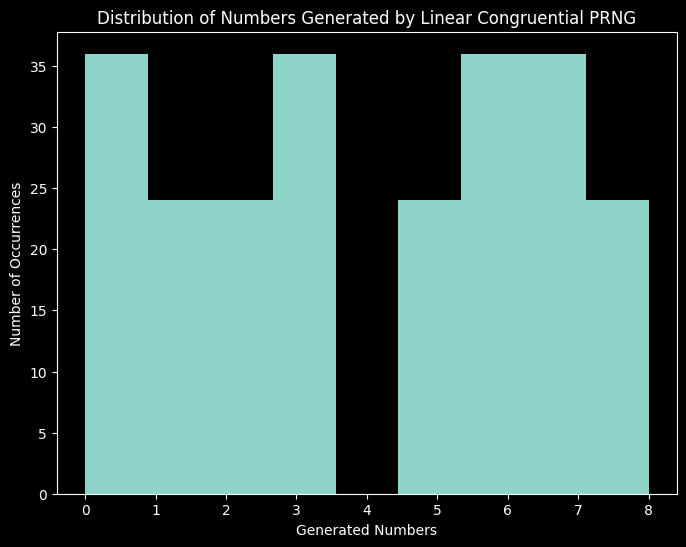

In [244]:
# 2. проверка равномерности
prg = PseudoRandomGeneratorLowerDigits(MODULE, MULTIPLIER, INCREMENT, START_VALUE, AMOUNT_LOWER_DIGITS)
generated_numbers = [prg.next() for _ in range(AMOUNT)]
cntr = Counter(generated_numbers)

print(generated_numbers)
nums = cntr.keys()
occurences = cntr.values()
bins = max(nums) - min(nums) + 1 # кол-во столбцов и промежутков между

plt.figure(figsize=(8, 6)) 
plt.hist(generated_numbers, bins)
plt.xlabel('Generated Numbers')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Numbers Generated by Linear Congruential PRNG')
plt.show()

Нашел кейс, где происходит неравномерное распределение, поэтому в отношении распределения младших разрядов нельзя говорить о равномерном распределении. Но стоит отметить, что довольно-таки часто можно получить случай, где распределение происходит равномерное.

In [245]:
prg_fabric = lambda: PseudoRandomGeneratorLowerDigits(MODULE, MULTIPLIER, INCREMENT, START_VALUE)

period_length = floyd_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}") # некорректно работает ...
# сейчас уже dummy_cycle_detection нельзя пользоваться ведь распределение неравномерное
period_length = dummy_cycle_detection(prg_fabric)
print(f"Длина периода: {period_length}")

Длина периода: 8
Длина периода: 4
